https://colab.research.google.com/drive/119TBoB4PmxHPv1bmqqMmP9crHTkNz7bl

In [2]:
import tensorflow as tf
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_train = X_train/255
X_test = X_test/255

In [5]:
model = Sequential()
model.add(Dense(32, input_dim=784, activation='relu'))
model.add(Dense(784, activation='relu'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, X_train, validation_data=(X_test, X_test),epochs=10, batch_size=1024, verbose=1)




Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0679 - acc: 0.0080 - val_loss: 0.0477 - val_acc: 0.0112
Epoch 2/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0381 - acc: 0.0118 - val_loss: 0.0306 - val_acc: 0.0106
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0274 - acc: 0.0104 - val_loss: 0.0238 - val_acc: 0.0123
Epoch 4/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0223 - acc: 0.0103 - val_loss: 0.0203 - val_acc: 0.0130
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0196 - acc: 0.0110 - val_loss: 0.0182 - val_acc: 0.0121
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0179 - acc: 0.0115 - val_loss: 0.0169 - val_acc: 0.0119
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0170 - acc: 0.0116 - val_loss: 0.0162 - val_

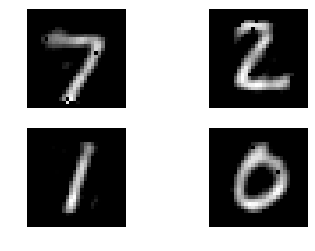

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(model.predict(X_test[0,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(222)
plt.imshow(model.predict(X_test[1,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(223)
plt.imshow(model.predict(X_test[2,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(224)
plt.imshow(model.predict(X_test[3,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

# Multi-layer auto encoder

In [0]:
model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(784, activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               79184     
Total params: 164,216
Trainable params: 164,216
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, X_train, validation_data=(X_test, X_test),epochs=25, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 1s 20us/step - loss: 0.0664 - val_loss: 0.0439
Epoch 2/25
60000/60000 [==============================] - 1s 15us/step - loss: 0.0334 - val_loss: 0.0262
Epoch 3/25
60000/60000 [==============================] - 1s 15us/step - loss: 0.0238 - val_loss: 0.0214
Epoch 4/25
60000/60000 [==============================] - 1s 15us/step - loss: 0.0207 - val_loss: 0.0195
Epoch 5/25
60000/60000 [==============================] - 1s 15us/step - loss: 0.0189 - val_loss: 0.0180
Epoch 6/25
60000/60000 [==============================] - 1s 14us/step - loss: 0.0179 - val_loss: 0.0173
Epoch 7/25
60000/60000 [==============================] - 1s 14us/step - loss: 0.0174 - val_loss: 0.0168
Epoch 8/25
60000/60000 [==============================] - 1s 14us/step - loss: 0.0170 - val_loss: 0.0165
Epoch 9/25
60000/60000 [==============================] - 1s 14us/step - loss: 0.0166 - val_loss: 0.0162
Epoch

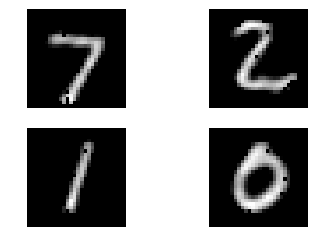

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(model.predict(X_test[0,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(222)
plt.imshow(model.predict(X_test[1,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(223)
plt.imshow(model.predict(X_test[2,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(224)
plt.imshow(model.predict(X_test[3,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

# Convolutional auto-encoder

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [0]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_train = X_train/255
X_test = X_test/255

In [0]:
from keras.layers.convolutional import UpSampling2D
from keras.layers import Reshape

In [0]:
from keras.layers import Conv2DTranspose

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same',name='conv1'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool1'))
model.add(Conv2D(16, (3,3), activation='relu',padding='same',name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool2'))
model.add(Conv2D(8, (3,3), activation='relu',padding='same',name='conv3'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool3'))
model.add(Conv2D(32, (3,3), activation='relu',padding='same',name='conv4'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool4'))
model.add(Flatten(name='flatten'))
model.add(Reshape((1,1,32)))
model.add(Conv2DTranspose(8, kernel_size = (3,3), activation='relu'))
model.add(Conv2DTranspose(16, kernel_size = (5,5), activation='relu'))
model.add(Conv2DTranspose(32, kernel_size = (8,8), activation='relu'))
model.add(Conv2DTranspose(32, kernel_size = (15,15), activation='relu'))
model.add(Conv2D(1, (3, 3), activation='relu',padding='same'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 16)        4624      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 16)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 7, 7, 8)           1160      
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 3, 3, 8)           0         
_________________________________________________________________
conv4 (Conv2D)               (None, 3, 3, 32)        

In [0]:
from keras.optimizers import Adam
adam = Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, X_train, validation_data=(X_test, X_test),epochs=10, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.0698 - val_loss: 0.0638
Epoch 2/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0629 - val_loss: 0.0609
Epoch 3/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0533 - val_loss: 0.0459
Epoch 4/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0413 - val_loss: 0.0357
Epoch 5/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0338 - val_loss: 0.0314
Epoch 6/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0296 - val_loss: 0.0279
Epoch 7/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0273 - val_loss: 0.0252
Epoch 8/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0247 - val_loss: 0.0237
Epoch 9/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0232 - val_loss: 0.

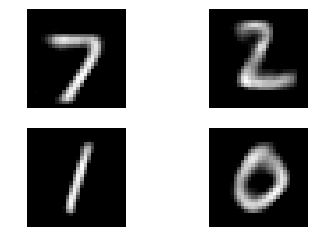

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.axis('off')
plt.imshow(model.predict(X_test[0,:,:,:].reshape(1,28,28,1)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.axis('off')
plt.imshow(model.predict(X_test[1,:,:,:].reshape(1,28,28,1)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.axis('off')
plt.imshow(model.predict(X_test[2,:,:,:].reshape(1,28,28,1)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.axis('off')
plt.imshow(model.predict(X_test[3,:,:,:].reshape(1,28,28,1)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()

# Grouping similar images

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_train = X_train/255
X_test = X_test/255

In [0]:
model = Sequential()
model.add(Dense(32, input_dim=784, activation='relu'))
#model.add(Dense(32,activation='relu'))
model.add(Dense(784, activation='relu'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, X_train, validation_data=(X_test, X_test),epochs=10, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0672 - acc: 0.0092 - val_loss: 0.0476 - val_acc: 0.0101
Epoch 2/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0387 - acc: 0.0106 - val_loss: 0.0313 - val_acc: 0.0083
Epoch 3/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0278 - acc: 0.0108 - val_loss: 0.0242 - val_acc: 0.0099
Epoch 4/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0225 - acc: 0.0107 - val_loss: 0.0202 - val_acc: 0.0088
Epoch 5/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0194 - acc: 0.0108 - val_loss: 0.0180 - val_acc: 0.0100
Epoch 6/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0177 - acc: 0.0111 - val_loss: 0.0168 - val_acc: 0.0100
Epoch 7/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0168 - acc: 0.0111 - val_loss: 0.0161 - val_acc

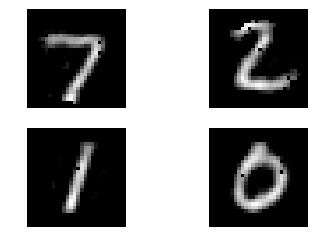

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(model.predict(X_test[0,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(222)
plt.imshow(model.predict(X_test[1,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(223)
plt.imshow(model.predict(X_test[2,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(224)
plt.imshow(model.predict(X_test[3,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

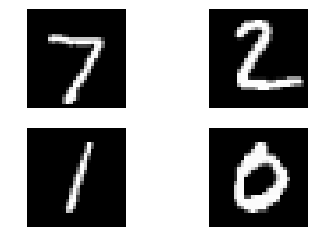

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow((X_test[0,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(222)
plt.imshow((X_test[1,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(223)
plt.imshow((X_test[2,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(224)
plt.imshow((X_test[3,:].reshape(1,784)).reshape(28,28), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

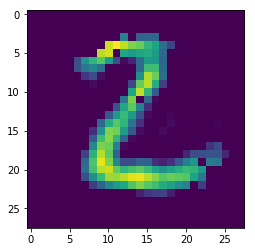

In [0]:
img=model.predict(X_test[1,:].reshape(1,784)).reshape(28,28)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)

In [0]:
!pip install bokeh

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.models import Model
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)

In [0]:
intermediate_output = intermediate_layer_model.predict(X_test)

In [9]:
intermediate_output.shape

(10000, 32)

In [0]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

In [0]:
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [12]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_img_label = tsne_model.fit_transform(intermediate_output)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.015s...
[t-SNE] Computed neighbors for 10000 samples in 6.194s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.021173
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.053978
[t-SNE] KL divergence after 1000 iterations: 1.791864


In [0]:
import pandas as pd
import numpy as np
tsne_df = pd.DataFrame(tsne_img_label, columns=['x', 'y'])
tsne_df['image_label'] = y_test

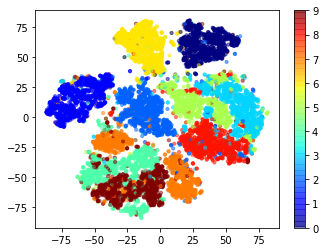

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
cmap = plt.cm.get_cmap('jet')
plt.scatter(tsne_df['x'], tsne_df['y'], 
            alpha=0.5, c=y_test, cmap=cmap, s=10)
plt.colorbar()